In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

import matplotlib.pyplot as plt
import joblib

In [27]:
def load_and_prepare_data(seed_dir, seeds_train, is_filename=False):
    train_df = []
    for i in seeds_train:
        if is_filename:
            seed_df = pd.read_csv(seed_dir+i.split('\\')[-1])
        else:
            seed_df = pd.read_csv(seed_dir+f'seir_seed_{i}.csv')
        seed_df['day'] = np.arange(len(seed_df))
        train_df.append(seed_df)
    
    train_df = pd.concat(train_df, ignore_index=True)
    train_df = train_df[train_df['Beta'] > 0].copy()
    
    #train_df['Beta'].replace(0, 1e-7, inplace=True)
    #train_df['Beta'] = train_df['Beta'].fillna(1e-7)
    
    train_df = train_df[(train_df['E'] > 0)|(train_df['I'] > 0)].copy()
    train_df['log_Beta'] = np.log(train_df['Beta'])
    return train_df

    
def train_model(train_df, model_file, 
                degree=3, alpha=0.0001, max_iter=5000):
    X = train_df[['day']].values
    y = train_df['log_Beta'].values

    model = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(include_bias=False, degree=degree),
        SGDRegressor(alpha=alpha, max_iter=max_iter, 
                     penalty='l2', warm_start=False)
    )
    model.fit(X, y)
    print(model.score(X, y))
    joblib.dump(model, model_file)
    

def search_params(seed_dir, model_file, df_seeds_n):
    np.random.seed(42)
    #model = joblib.load(model_file)
    model = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(include_bias=False),
        SGDRegressor(penalty='l2', warm_start=False)
    )
    seeds_2_n = df_seeds_n[df_seeds_n.set!='test']['file'].values
    train_df = load_and_prepare_data(seed_dir, seeds_2_n,
                                    is_filename=is_filename)
    X = train_df[['day']].values
    y = train_df['log_Beta'].values

    param_distributions = {"sgdregressor__alpha": [0.1,0.05,0.01,0.005,
                                                   0.001,0.0005,0.0001],
                           "polynomialfeatures__degree": [3,4]
                          }
    # searches everything, but for future purposes 
    # we have RandomizedSearch, not GridSearch
    search = RandomizedSearchCV(model, param_distributions,
                                n_iter=14,
                                scoring='r2'
                               ).fit(X, y)

    joblib.dump(search.best_estimator_, model_file)

    print(search.best_params_, search.best_score_)
    return search.best_estimator_
    
    
def plot(model_file, train_df):
    model = joblib.load(model_file)
    
    X = train_df[['day']].values
    y = train_df['log_Beta'].values
    print('r2: ', model.score(X, y))

    fig = plt.figure(figsize=(5, 3)) 
    plt.plot(X, y, alpha=0.1, ls='', marker='.')
    pred = model.predict(np.arange(250).reshape(-1, 1))
    plt.plot(np.arange(250), pred)
    plt.ylim(np.quantile(y,.0001), 0)
    plt.grid()

    fig = plt.figure(figsize=(5, 3)) 
    plt.plot(train_df.day, train_df.Beta, ls='', marker='.', alpha=.1)
    plt.plot(np.arange(250), np.exp(pred))
    plt.ylim(0, train_df.Beta.quantile(0.99))
    plt.grid()

## barabasi-albert

0.5186673751230402
0.5186673751230402


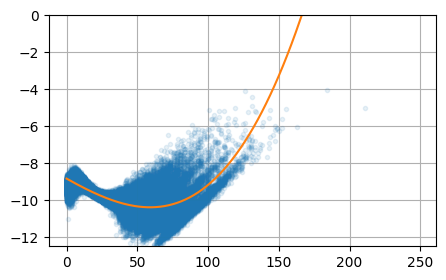

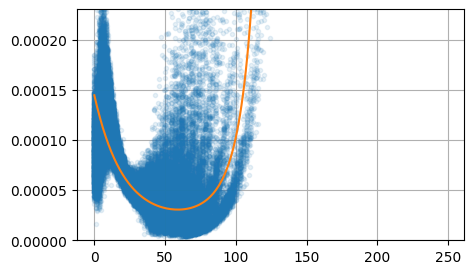

In [10]:
seed_dir='initial_data/initial_data_ba_10000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

0.6342149450905763
0.6342149450905763


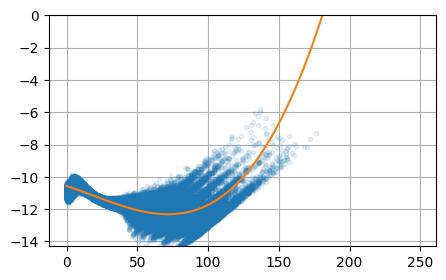

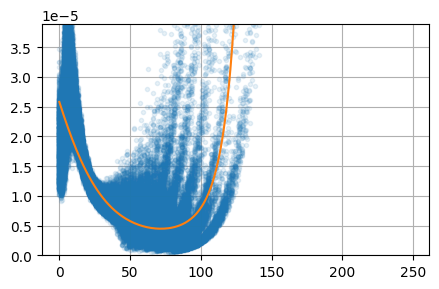

In [19]:
seed_dir='initial_data/initial_data_ba_50000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

0.6995692668545743
0.6995692668545743


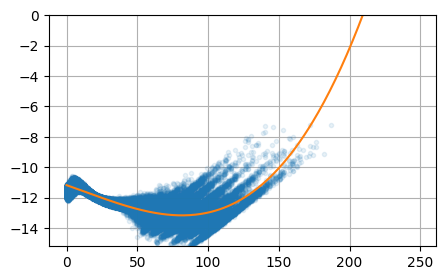

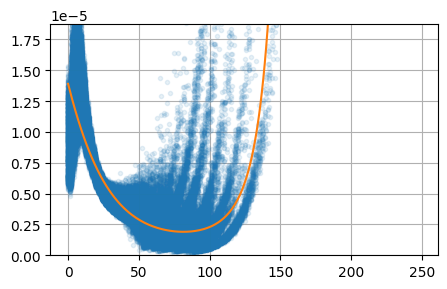

In [11]:
seed_dir='initial_data/initial_data_ba_100000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

## new

In [28]:
df_seeds_n = pd.read_csv('initial_data/new_seeds_parameters.csv')
seeds_train_n = df_seeds_n[df_seeds_n.set=='train']['file'].values
seeds_val_n = df_seeds_n[df_seeds_n.set=='val']['file'].values

seeds_fin_n = df_seeds_n[df_seeds_n.set!='test']['file'].values
is_filename = True

{'sgdregressor__alpha': 0.001, 'polynomialfeatures__degree': 3} 0.5815830781604104
r2:  0.662731766284028


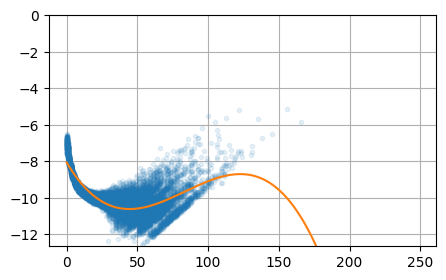

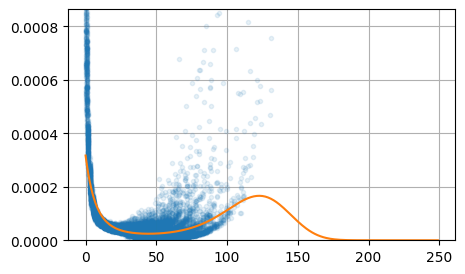

In [30]:
seed_dir='initial_data/new_ba_10000/'
model_file = seed_dir+'regression_day_for_seir.joblib'


the_m = search_params(seed_dir, model_file, df_seeds_n)

val_df = load_and_prepare_data(seed_dir, seeds_val_n,
                                    is_filename=is_filename)
plot(model_file, val_df);

{'sgdregressor__alpha': 0.0005, 'polynomialfeatures__degree': 3} 0.6075001749516923
r2:  0.6646998303896616


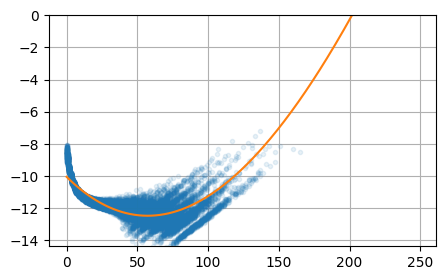

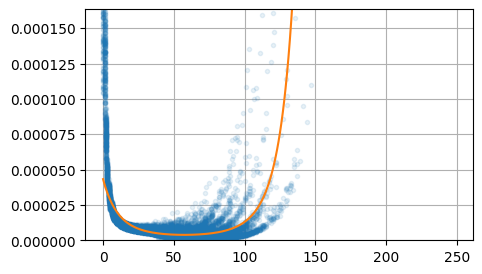

In [31]:
seed_dir='initial_data/new_ba_50000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

the_m = search_params(seed_dir, model_file, df_seeds_n)

val_df = load_and_prepare_data(seed_dir, seeds_val_n,
                                    is_filename=is_filename)
plot(model_file, val_df);

{'sgdregressor__alpha': 0.0001, 'polynomialfeatures__degree': 3} 0.6512672497381032
r2:  0.7081738181837172


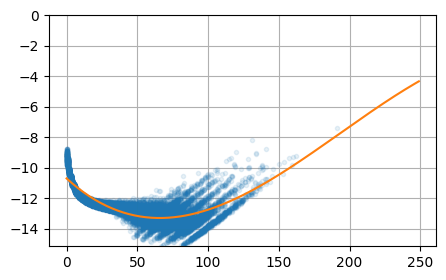

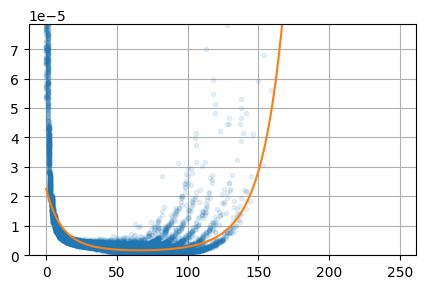

In [32]:
seed_dir='initial_data/new_ba_100000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

the_m = search_params(seed_dir, model_file, df_seeds_n)

val_df = load_and_prepare_data(seed_dir, seeds_val_n,
                                    is_filename=is_filename)
plot(model_file, val_df);

{'sgdregressor__alpha': 0.005, 'polynomialfeatures__degree': 3} 0.22568829703949672
r2:  0.3715270134410955


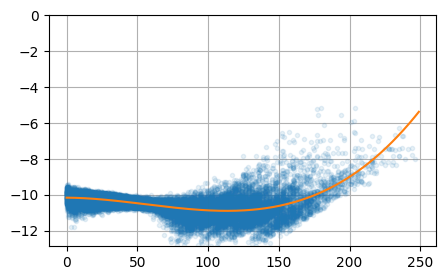

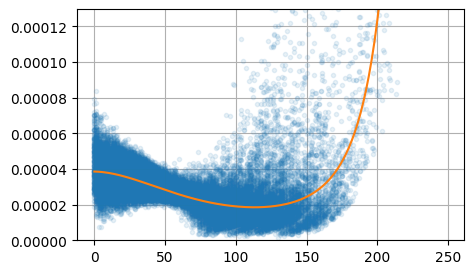

In [33]:
seed_dir='initial_data/new_r_10000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

the_m = search_params(seed_dir, model_file, df_seeds_n)

val_df = load_and_prepare_data(seed_dir, seeds_val_n,
                                    is_filename=is_filename)
plot(model_file, val_df);

{'sgdregressor__alpha': 0.1, 'polynomialfeatures__degree': 3} 0.3702345604651224
r2:  0.4684150471434333


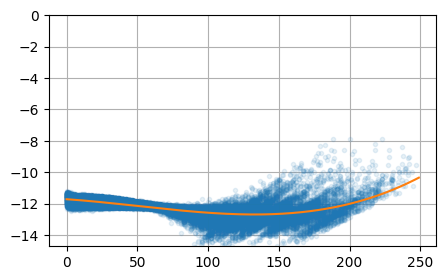

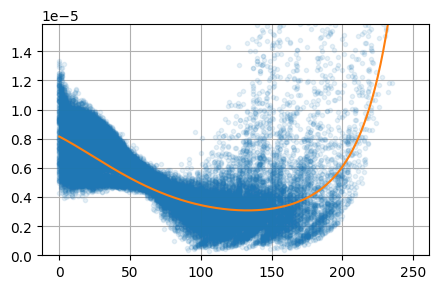

In [34]:
seed_dir='initial_data/new_r_50000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

the_m = search_params(seed_dir, model_file, df_seeds_n)

val_df = load_and_prepare_data(seed_dir, seeds_val_n,
                                    is_filename=is_filename)
plot(model_file, val_df);

{'sgdregressor__alpha': 0.0001, 'polynomialfeatures__degree': 4} 0.43370968401018306
r2:  0.5318235819351678


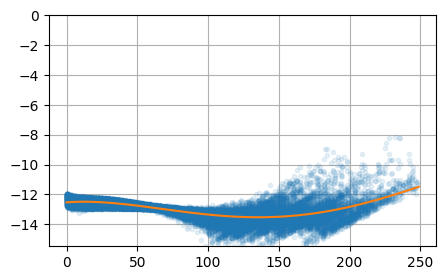

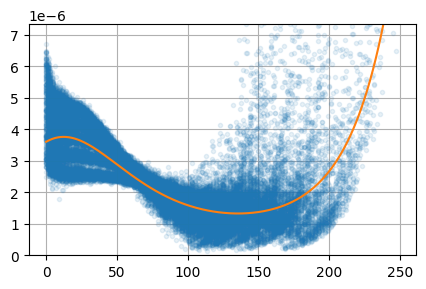

In [35]:
seed_dir='initial_data/new_r_100000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

the_m = search_params(seed_dir, model_file, df_seeds_n)

val_df = load_and_prepare_data(seed_dir, seeds_val_n,
                                    is_filename=is_filename)
plot(model_file, val_df);

{'sgdregressor__alpha': 0.0001, 'polynomialfeatures__degree': 4} -0.22411458779526489
r2:  0.3732317202091513


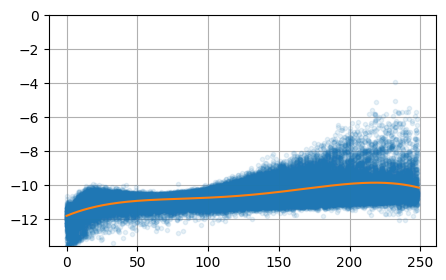

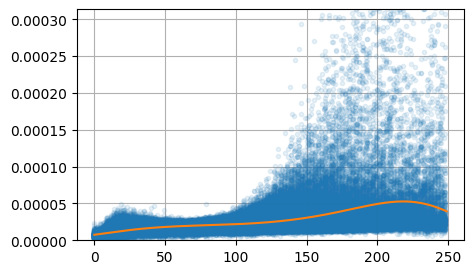

In [36]:
seed_dir='initial_data/new_sw_10000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

the_m = search_params(seed_dir, model_file, df_seeds_n)

val_df = load_and_prepare_data(seed_dir, seeds_val_n,
                                    is_filename=is_filename)
plot(model_file, val_df);

{'sgdregressor__alpha': 0.0005, 'polynomialfeatures__degree': 4} -0.3867855935235454
r2:  0.47730419776197286


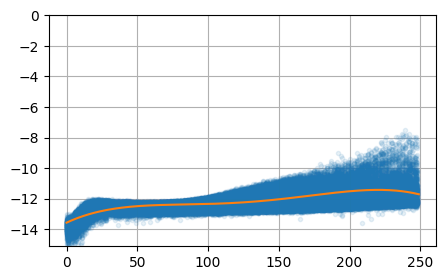

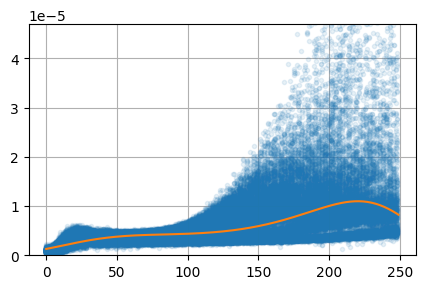

In [37]:
seed_dir='initial_data/new_sw_50000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

the_m = search_params(seed_dir, model_file, df_seeds_n)

val_df = load_and_prepare_data(seed_dir, seeds_val_n,
                                    is_filename=is_filename)
plot(model_file, val_df);

{'sgdregressor__alpha': 0.0001, 'polynomialfeatures__degree': 4} -0.34865430837756717
r2:  0.5119560578562243


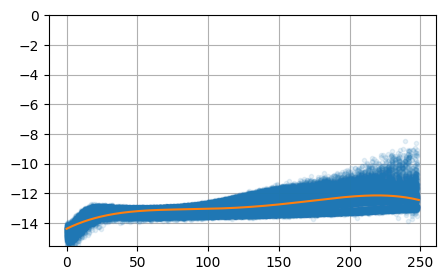

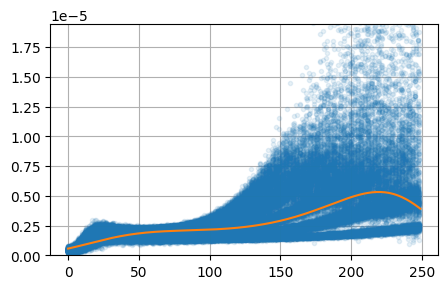

In [38]:
seed_dir='initial_data/new_sw_100000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

the_m = search_params(seed_dir, model_file, df_seeds_n)

val_df = load_and_prepare_data(seed_dir, seeds_val_n,
                                    is_filename=is_filename)
plot(model_file, val_df);

## random

0.340264740492607
0.340264740492607


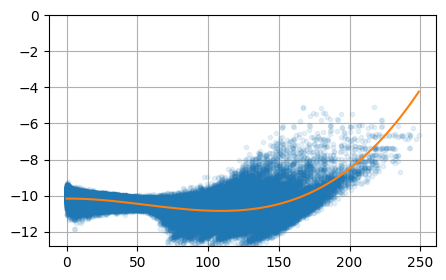

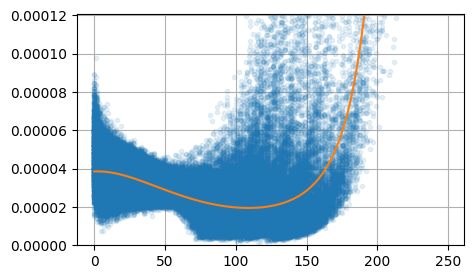

In [4]:
seed_dir='initial_data/initial_data_r_10000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

0.47189766884949147
0.47189766884949147


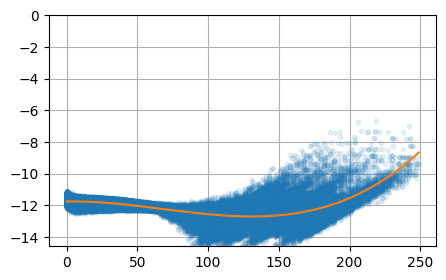

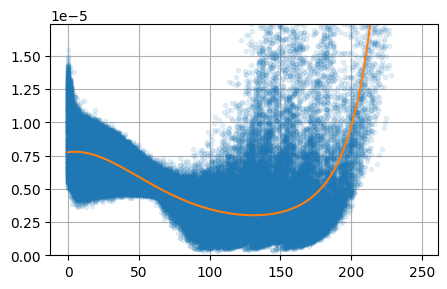

In [18]:
seed_dir='initial_data/initial_data_r_50000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

0.49784350036230474
0.49784350036230474


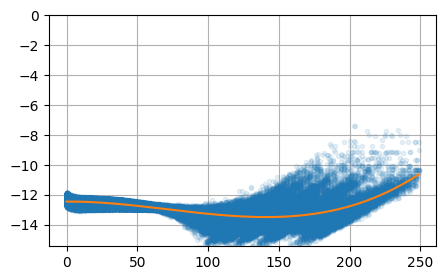

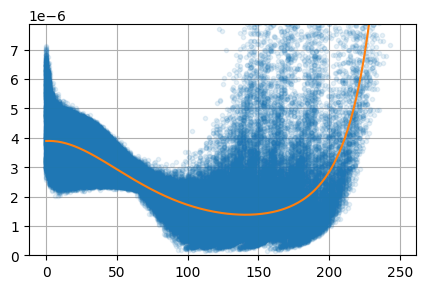

In [15]:
seed_dir='initial_data/initial_data_r_100000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

0.3759890871759606
0.3759890871759606


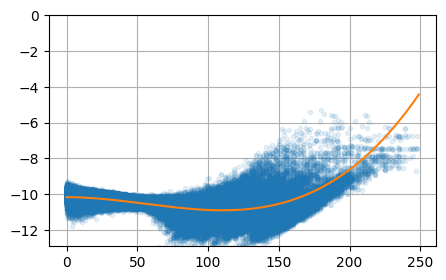

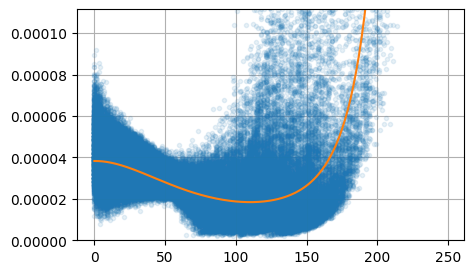

In [8]:
df_seeds_n = pd.read_csv('initial_data/new_seeds_parameters.csv')
seeds_train_n = df_seeds_n[df_seeds_n.set!='test']['file'].values

seed_dir='initial_data/new_r_10000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train_n,
                                is_filename=True)
train_model(train_df, model_file)
plot(model_file)

0.5316382682919196
0.5316382682919196


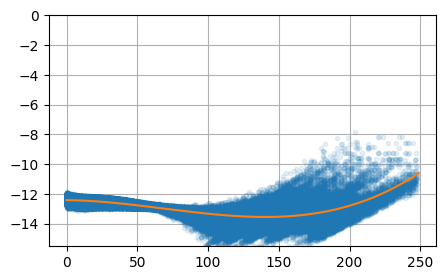

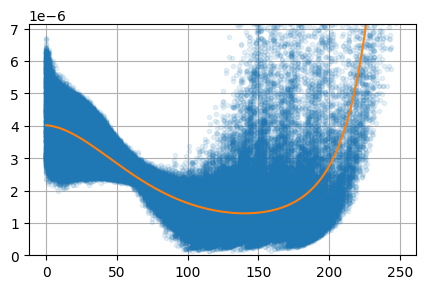

In [14]:
df_seeds_n = pd.read_csv('initial_data/new_seeds_parameters.csv')
seeds_train_n = df_seeds_n[df_seeds_n.set!='test']['file'].values

seed_dir='initial_data/new_r_100000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train_n,
                                is_filename=True)
train_model(train_df, model_file)
plot(model_file)

## small world

0.30791474695016896
0.30791474695016896


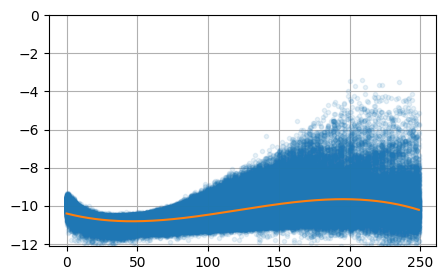

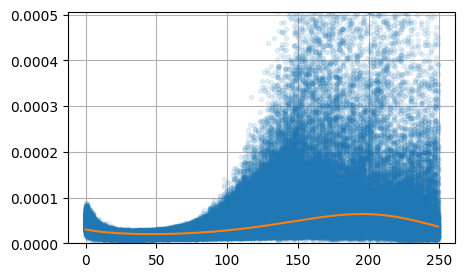

In [163]:
seed_dir='initial_data/initial_data_sw_10000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

0.39123335581544205
0.39123335581544205


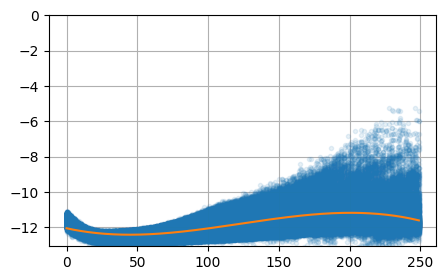

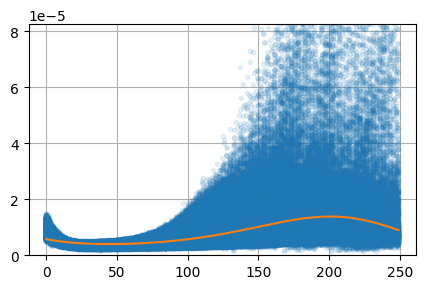

In [17]:
seed_dir='initial_data/initial_data_sw_50000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

0.419890890851487
0.419890890851487


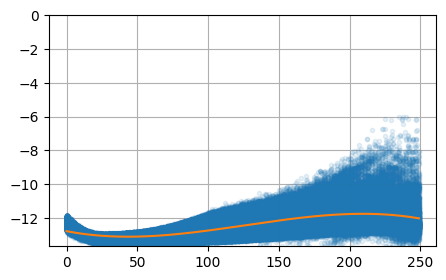

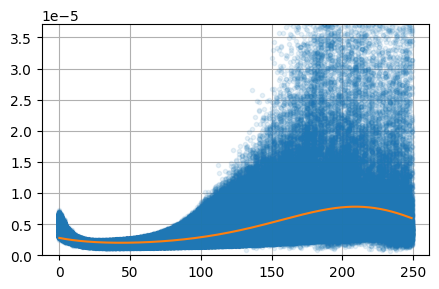

In [16]:
seed_dir='initial_data/initial_data_sw_100000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file)
plot(model_file)

0.35276073438782607
0.35276073438782607


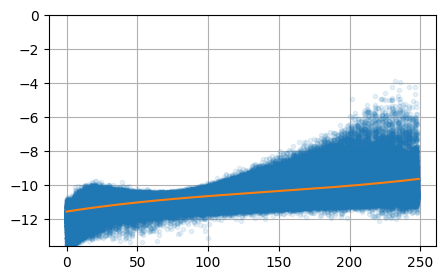

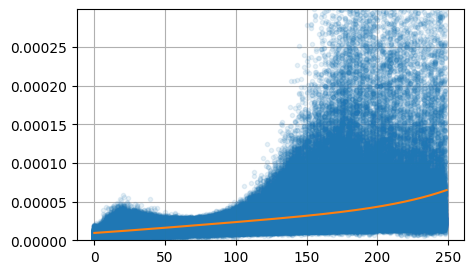

In [10]:
df_seeds_n = pd.read_csv('initial_data/new_seeds_parameters.csv')
seeds_train_n = df_seeds_n[df_seeds_n.set!='test']['file'].values

seed_dir='initial_data/new_sw_10000/'
model_file = seed_dir+'regression_day_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train_n,
                                is_filename=True)
train_model(train_df, model_file)
plot(model_file)